In [18]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import GPy
from dgp_sampler import DGP_sampler
from sklearn.model_selection import train_test_split
X = np.linspace(0,10.,5000)[:,None]

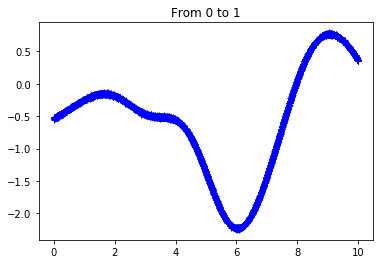

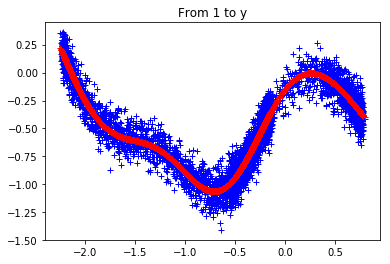

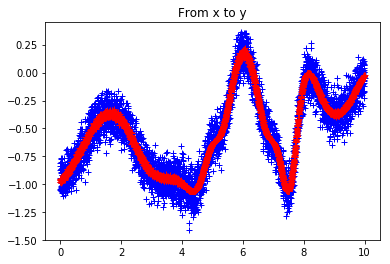

In [59]:
DGP = DGP_sampler(X,kern_vars=np.array([1,0.8]),kern_lens=np.array([1.2,0.6]))
y = DGP.sample_1D(out_var=[1e-2], layer_noise=True, layer_var= [1e-4], layer_plots=True)

## WRITE DATA INTO A .txt FILE

In [60]:
file_name = 'data_DGPS/DGPS_4.txt'
data = np.concatenate((X,y), axis=1) #5000x2
np.savetxt(file_name, data,delimiter=',')

In [61]:
data

array([[  0.00000000e+00,  -8.31849492e-01],
       [  2.00040008e-03,  -1.05171644e+00],
       [  4.00080016e-03,  -8.09269057e-01],
       ..., 
       [  9.99599920e+00,   7.54385285e-03],
       [  9.99799960e+00,  -3.92129582e-02],
       [  1.00000000e+01,  -5.20690373e-02]])

### Split into training and test sets for validation

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=42)
file_name_train, file_name_test = 'data_DGPS/DGPS_4_train.txt' , 'data_DGPS/DGPS_4_test.txt'
data_train = np.concatenate((X_train,y_train), axis=1) #3000x2
data_test = np.concatenate((X_test,y_test), axis=1) #2000x2
np.savetxt(file_name_train, data_train,delimiter=',')
np.savetxt(file_name_test, data_test,delimiter=',')
data_test.shape

(2000, 2)

### Recover data from file

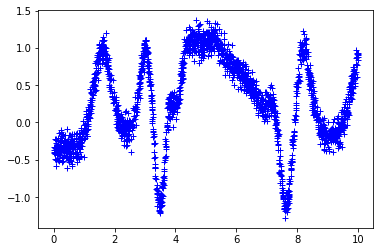

(2000, 1)

In [58]:
Z,u = np.loadtxt(file_name_test, delimiter=',', unpack=True)
Z = Z[:,None]
u = u[:,None]

plt.plot(Z,u,'+b')
plt.show()
Z.shape

## Adding to an existing file

In [74]:
with open(file_name,'a') as temp: 
    np.savetxt(temp, data,delimiter=',')

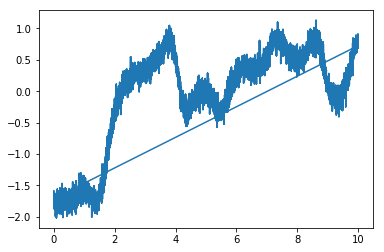

In [75]:
Z,u = np.loadtxt(file_name, delimiter=',', unpack=True)
Z = Z[:,None]
u = u[:,None]

plt.plot(Z,u)
plt.show()
Z.shape

In [86]:
results_file = 'data_DGPS/DGPS_0.txt'
array = np.loadtxt(results_file, delimiter=',', unpack=True)
array

array([ 10.        ,   0.09407813,   0.15582108,   0.36064074,   0.37757547])